Import libraries

In [725]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import functions as ff
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

Scaling using Standard Scaler

All variables were standardized to z-scores, with a mean = 0 and standard deviation = 1.

In [726]:
df= pd.read_excel('../df_SPY_VBMFX_Macro_Signals.xlsx',index_col=0,sheet_name='Sheet1')
scaler = StandardScaler() # initialize 
X_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(X_scaled, index=df.index, columns=df.columns)

In [727]:
df.columns

Index(['SPY', 'SPY_mom', 'SPY_3m', 'SPY_3m_ann', 'SPY_3m_sd', 'SPY_3m_ann_sd',
       'SPY_ln_3m', 'SPY_ann_ln_3m', 'VBMFX', 'VBMFX_mom', 'VBMFX_3m',
       'VBMFX_3m_ann', 'VBMFX_3m_sd', 'VBMFX_3m_ann_sd', 'VBMFX_ln_3m',
       'VBMFX_ann_ln_3m', 'RealGDP', 'RealGDP_lag', 'RealGDP_mom',
       'RealGDP_yoy', 'UnemploymentRate', 'UnRate_mom', 'UnRate_3m',
       'UnRate_yoy', 'Permits', 'Permits_Lag_r3m', 'Permits_Lag_ann_r3m',
       'PermitsLag_yoy', 'CPI', 'CPI_Lag_r3m', 'CPI_Lag_ann_r3m', 'CPILag_yoy',
       'CoreCPI', 'CoreCPI_Lag_r3m', 'CoreCPI_Lag_ann_r3m', 'CoreCPILag_yoy',
       'IndustrialProd', 'IndustrialProd_Lag_r3m',
       'IndustrialProd_Lag_ann_r3m', 'IndustrialProdLag_yoy', 'RetailTrade',
       'RetailTrade_Lag_r3m', 'RetailTrade_Lag_ann_r3m', 'RetailTrade_Lag_yoy',
       'Mort30Y', 'UST10Y', 'UST2Y', 'UST3M', 'CorpBAA', 'CorpAAA',
       'FedFundsRate', 'Mort30Y_Delta1m', 'Mort30Y_Delta3m', 'UST10Y_Delta1m',
       'UST10Y_Delta3m', 'UST2Y_Delta1m', 'UST2Y_Delta3

Use PCA to reduce redundancy.

In [728]:
pca = PCA(n_components=0.95, random_state=42) # initialize pca object, 42 seed data
X_pca = pca.fit_transform(df_scaled) # making sure to use the scaled data set
# result of pca is a matrix and need to convert to a df
df_pca = pd.DataFrame(
    X_pca,
    index=df_scaled.index,
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
)

In [729]:
len(df.columns)

83

In [730]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 390 entries, 1993-04-30 to 2025-09-30
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     390 non-null    float64
 1   PC2     390 non-null    float64
 2   PC3     390 non-null    float64
 3   PC4     390 non-null    float64
 4   PC5     390 non-null    float64
 5   PC6     390 non-null    float64
 6   PC7     390 non-null    float64
 7   PC8     390 non-null    float64
 8   PC9     390 non-null    float64
 9   PC10    390 non-null    float64
 10  PC11    390 non-null    float64
 11  PC12    390 non-null    float64
 12  PC13    390 non-null    float64
 13  PC14    390 non-null    float64
 14  PC15    390 non-null    float64
 15  PC16    390 non-null    float64
 16  PC17    390 non-null    float64
 17  PC18    390 non-null    float64
 18  PC19    390 non-null    float64
 19  PC20    390 non-null    float64
 20  PC21    390 non-null    float64
 21  PC22    390 non-null

In [731]:
df_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
1993-04-30,3.019734,-4.305039,-2.413927,1.070122,-0.745079,-0.290046,1.482077,1.066178,2.879099,-1.762570,...,-0.170289,-0.557977,1.161263,0.838685,0.316552,2.506824,0.128219,-0.005041,0.276531,-0.357799
1993-05-31,0.000006,-4.266361,-3.824712,0.201327,-1.139076,-1.854283,0.486356,0.240935,2.449250,-1.086346,...,0.603833,1.001763,0.998671,0.559800,-0.996507,-0.479939,0.419632,-0.959230,1.067273,-0.311124
1993-06-30,3.135008,-5.037027,-0.564037,-1.096907,-2.491247,-2.380750,-1.494817,0.740305,0.120123,-1.589936,...,1.911215,0.939052,0.524914,0.172951,-1.119489,-0.243629,0.797465,-1.104416,0.566483,0.165517
1993-07-31,1.263422,-4.319462,-2.837859,-0.838144,-1.428877,-0.302576,0.873010,1.561595,2.668288,-0.499414,...,-0.584320,0.283609,0.797488,-0.152367,-0.840372,1.659879,-0.119274,-0.164433,1.087410,1.048848
1993-08-31,4.904942,-4.874607,-0.392310,-3.782832,-1.399059,-1.305637,-0.191490,1.173352,1.320993,-0.753101,...,0.985222,0.232033,0.677140,-0.502031,-1.032981,1.039407,0.049817,-0.438396,0.737517,0.276881


PCA reduced the 90 original features to 24 principal components. These 24 components 95% percent of the variance. 

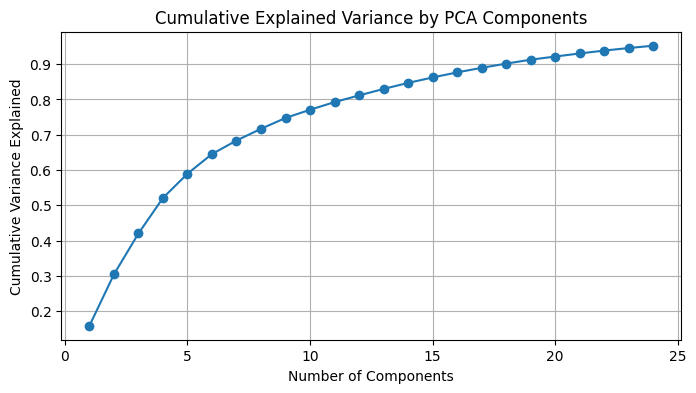

Number of components selected: 24


In [732]:
explained = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,4))
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()
print(f"Number of components selected: {pca.n_components_}")

In [733]:
# get original feature names
feature_names = df_scaled.columns
# get the component matrix
loadings_matrix = pca.components_
n_pcs = pca.n_components_ # get number of components, should be 24
# create dataframes
df_loadings = pd.DataFrame(
    loadings_matrix.T, # transpose to have Features as rows and PCs as columns
    columns=[f'PC{i+1}' for i in range(n_pcs)],
    index=feature_names
)

In [734]:
# select a component
pc1_loadings = df_loadings['PC1']
top_pc1_loadings = pc1_loadings.abs().sort_values(ascending=False).head(5) # get the absolute val, sort
top_features_pc1 = df_loadings.loc[top_pc1_loadings.index, 'PC1'] # get the features
print("Top 5 Feature Loadings for PC1:")
print(top_features_pc1)

Top 5 Feature Loadings for PC1:
VBMFX_ann_ln_3m    0.215731
VBMFX_3m           0.215311
VBMFX_3m_ann       0.213519
UST10Y_Delta3m    -0.210575
Mort30Y_Delta3m   -0.207849
Name: PC1, dtype: float64


In [735]:
# select a component
pc2_loadings = df_loadings['PC2']
top_pc2_loadings = pc2_loadings.abs().sort_values(ascending=False).head(5) # get the absolute val, sort
top_features_pc2 = df_loadings.loc[top_pc2_loadings.index, 'PC2'] # get the features
print("Top 5 Feature Loadings for PC2:")
print(top_features_pc2)

Top 5 Feature Loadings for PC2:
UST10Y    -0.261042
UST2Y     -0.253448
CorpAAA   -0.246787
VBMFX      0.245555
Mort30Y   -0.245427
Name: PC2, dtype: float64


In [736]:
# select a component
pc3_loadings = df_loadings['PC3']
top_pc3_loadings = pc3_loadings.abs().sort_values(ascending=False).head(5) # get the absolute val, sort
top_features_pc3 = df_loadings.loc[top_pc3_loadings.index, 'PC3'] # get the features
print("Top 5 Feature Loadings for pc3:")
print(top_features_pc3)

Top 5 Feature Loadings for pc3:
Slope_10Y_3M   -0.233341
Slope_10Y_FF   -0.218221
Slope_10Y_2Y   -0.199316
SPY             0.196681
RetailTrade     0.187638
Name: PC3, dtype: float64


Clustering

We used the PCA-transformed features as inputs for the kMeans clustering analysis. 

In [737]:
best_k = 7 # set to 5 clusters
kmeans = KMeans(n_clusters=best_k, random_state=42,n_init=10) #n_init=10 is 'auto'
df_clusters = df_pca.copy()
df_clusters['Regime'] = kmeans.fit_predict(df_pca) # making sure to use the df_pca

Graph below shows the regime clusters over time, highlighting regime transitions. These regime-clusters will be used to label each observation(row) in our dataset.

We originally set the clusters to 4 but the 4 clusters showed limited differentiation when comparing their average sharpe-ratio. 

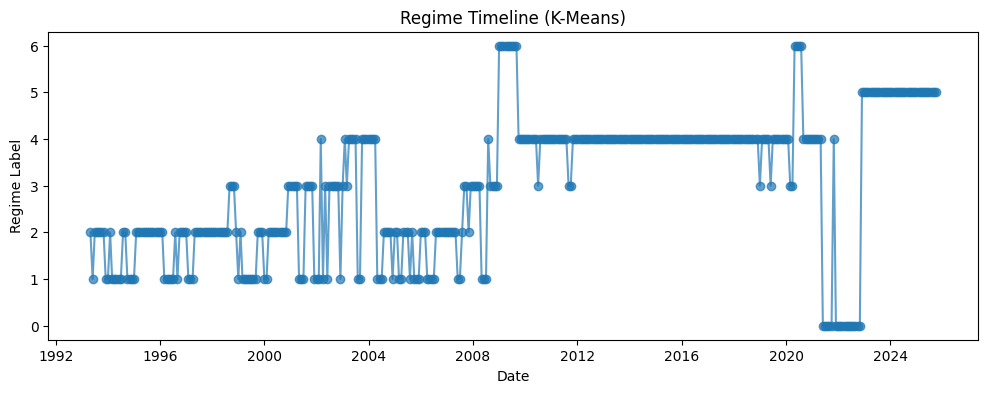

In [738]:
plt.figure(figsize=(12,4))
plt.plot(df_clusters.index, df_clusters['Regime'], marker='o', linestyle='-', alpha=0.7)
plt.title("Regime Timeline (K-Means)")
plt.xlabel("Date")
plt.ylabel("Regime Label")
plt.yticks(np.arange(df_clusters['Regime'].min(), df_clusters['Regime'].max() + 1, 1))
plt.show()

In [739]:
df_clusters.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,Regime
1993-04-30,3.019734,-4.305039,-2.413927,1.070122,-0.745079,-0.290046,1.482077,1.066178,2.879099,-1.762570,...,-0.557977,1.161263,0.838685,0.316552,2.506824,0.128219,-0.005041,0.276531,-0.357799,2
1993-05-31,0.000006,-4.266361,-3.824712,0.201327,-1.139076,-1.854283,0.486356,0.240935,2.449250,-1.086346,...,1.001763,0.998671,0.559800,-0.996507,-0.479939,0.419632,-0.959230,1.067273,-0.311124,1
1993-06-30,3.135008,-5.037027,-0.564037,-1.096907,-2.491247,-2.380750,-1.494817,0.740305,0.120123,-1.589936,...,0.939052,0.524914,0.172951,-1.119489,-0.243629,0.797465,-1.104416,0.566483,0.165517,2
1993-07-31,1.263422,-4.319462,-2.837859,-0.838144,-1.428877,-0.302576,0.873010,1.561595,2.668288,-0.499414,...,0.283609,0.797488,-0.152367,-0.840372,1.659879,-0.119274,-0.164433,1.087410,1.048848,2
1993-08-31,4.904942,-4.874607,-0.392310,-3.782832,-1.399059,-1.305637,-0.191490,1.173352,1.320993,-0.753101,...,0.232033,0.677140,-0.502031,-1.032981,1.039407,0.049817,-0.438396,0.737517,0.276881,2


We will use the cluster labels to add the regimes to our original data set.

In [740]:
df = df.join(df_clusters['Regime'], how='inner')

In [741]:
df_summary = df.groupby('Regime')[["SPY_3m","VBMFX_3m"]].agg(['mean','std']) # groupby using the regime, and then find teh mean and std
df_summary.columns = ['SPY_mean','SPY_std','VBMFX_mean','VBMFX_std'] # make single column

# Sharpe ratios ( excluding risk free rate) - using this as an estimate
df_summary['SPY_Sharpe'] = df_summary['SPY_mean'] / df_summary['SPY_std']
df_summary['VBMFX_Sharpe'] = df_summary['VBMFX_mean'] / df_summary['VBMFX_std']
df_summary = df_summary[['SPY_mean', 'SPY_std', 'SPY_Sharpe','VBMFX_mean','VBMFX_std','VBMFX_Sharpe']] # re-order columns

We are using a modified version of the sharpe ratio ( expected returns minus the risk-free rate divided by the standard deviation). We will exclude the risk-free return. This measure is not risk adjusted ratio.

In [742]:
df_summary['Indicator'] = df_summary.apply(ff.bucket_indicator, axis=1)

In [743]:
df_summary

,SPY_mean,SPY_std,SPY_Sharpe,VBMFX_mean,VBMFX_std,VBMFX_Sharpe,Indicator
Regime,,,,,,,
0,-0.004991,0.073423,-0.067969,-0.022243,0.034327,-0.647985,0.580016
1,0.029904,0.048186,0.620588,-0.005098,0.012785,-0.398751,1.019339
2,0.049869,0.053261,0.936316,0.024829,0.013685,1.814288,-0.877972
3,-0.091606,0.070888,-1.292267,0.027691,0.015674,1.766616,-3.058883
4,0.044680,0.050868,0.878340,0.008655,0.015729,0.550223,0.328116
5,0.052184,0.057737,0.903819,0.010603,0.028995,0.365689,0.538129
6,0.028472,0.156575,0.181844,0.027115,0.014669,1.848392,-1.666548


In [744]:
df_summary['Bucket'] = df_summary.apply(ff.assign_bucket, axis=1)

In [745]:
df_summary

,SPY_mean,SPY_std,SPY_Sharpe,VBMFX_mean,VBMFX_std,VBMFX_Sharpe,Indicator,Bucket
Regime,,,,,,,,
0,-0.004991,0.073423,-0.067969,-0.022243,0.034327,-0.647985,0.580016,70/30
1,0.029904,0.048186,0.620588,-0.005098,0.012785,-0.398751,1.019339,80/20
2,0.049869,0.053261,0.936316,0.024829,0.013685,1.814288,-0.877972,50/50
3,-0.091606,0.070888,-1.292267,0.027691,0.015674,1.766616,-3.058883,50/50
4,0.044680,0.050868,0.878340,0.008655,0.015729,0.550223,0.328116,60/40
5,0.052184,0.057737,0.903819,0.010603,0.028995,0.365689,0.538129,70/30
6,0.028472,0.156575,0.181844,0.027115,0.014669,1.848392,-1.666548,50/50


In [746]:
bucket_map = df_summary['Bucket'].to_dict()
df['Bucket'] = df['Regime'].map(bucket_map)

Backtesting our clusters

Using in-sample backtesting, we will use the entire data set to compare a 60/40 portfolio to a dynamic allocatio portfolio.

In [747]:
# create a target column whose values represent the asset allocation strategy
weights = {'80/20': (0.8, 0.2), # stock/bond split
           '70/30': (0.7, 0.3),
           '60/40': (0.6, 0.4),
           '50/50': (0.5, 0.5)}

# create a dynamic portfolio using the weights we assigned using the clustering methodology
# multiple the monthly return by the weight for SPY and VBMFX
df['Dynamic_Return'] = df.apply(
    lambda row: weights[row['Bucket']][0]*row['SPY_mom'] + # [0] is stock allocation
                weights[row['Bucket']][1]*row['VBMFX_mom'], axis=1) # [1] is bond allocation

df['Static_6040'] = 0.6*df['SPY_mom'] + 0.4*df['VBMFX_mom'] # 60/40 allocation
df['Static_7030'] = 0.7*df['SPY_mom'] + 0.3*df['VBMFX_mom'] # 70/30 allocation
df['Static_8020'] = 0.8*df['SPY_mom'] + 0.2*df['VBMFX_mom'] # 80/20 allocation
df['Static_9010'] = 0.9*df['SPY_mom'] + 0.1*df['VBMFX_mom'] # 90/10 allocation
df['Static_100'] = 1.0*df['SPY_mom'] + 0.0*df['VBMFX_mom'] # 100/0 allocation


def performance_metrics(series):
    """returns a dataframe summarizing the return and std for each portfolio"""
    avg_ret = series.mean() * 12
    std = series.std() * np.sqrt(12)
    sharpe = avg_ret / std
    cum_return = (1 + series).prod() - 1
    return avg_ret, std, sharpe, cum_return

metrics = pd.DataFrame({
    'Dynamic Portfolio': performance_metrics(df['Dynamic_Return']),
    'Static_60/40': performance_metrics(df['Static_6040']),
    'Static_70/30': performance_metrics(df['Static_7030']),
    'Static_80/20': performance_metrics(df['Static_8020']),
    'Static_90/10': performance_metrics(df['Static_9010']),
    'Static_100/0': performance_metrics(df['Static_100'])
}, index=['Annualized Return', 'Annualized Std', 'Sharpe', 'Cumulative Return'])


In [748]:
metrics

,Dynamic Portfolio,Static_60/40,Static_70/30,Static_80/20,Static_90/10,Static_100/0
Annualized Return,0.094865,0.085238,0.092015,0.098791,0.105568,0.112345
Annualized Std,0.091260,0.093129,0.106523,0.120224,0.134137,0.148202
Sharpe,1.039508,0.915265,0.863797,0.821728,0.787019,0.758051
Cumulative Return,17.856373,12.739048,15.370637,18.365969,21.743829,25.516929


In [749]:
# compute cumulative returns, turns the monthly returns into growth factors and then returns the cumulative return
cum_returns = (df[['Dynamic_Return', 'Static_6040','Static_7030','Static_8020','Static_9010','Static_100']] + 1).cumprod()
cum_returns.tail(5)

,Dynamic_Return,Static_6040,Static_7030,Static_8020,Static_9010,Static_100
2025-05-31,17.072505,12.559975,14.821927,17.365866,20.199939,23.326524
2025-06-30,17.767089,13.026164,15.424947,18.134334,21.165878,24.525186
2025-07-31,18.037617,13.190615,15.659813,18.457634,21.598293,25.090038
2025-08-31,18.341704,13.396892,15.923814,18.791327,22.015123,25.604874
2025-09-30,18.856373,13.739048,16.370637,19.365969,22.743829,26.516929


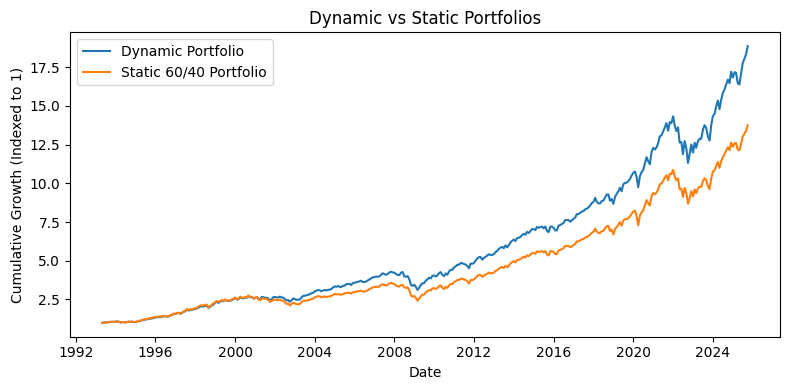

In [750]:
# plot the cumulative returns
plt.figure(figsize=(8, 4))
plt.plot(cum_returns.index, cum_returns['Dynamic_Return'], label='Dynamic Portfolio')
plt.plot(cum_returns.index, cum_returns['Static_6040'], label='Static 60/40 Portfolio')
plt.title('Dynamic vs Static Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Growth (Indexed to 1)')
plt.legend()
plt.tight_layout()
plt.show()

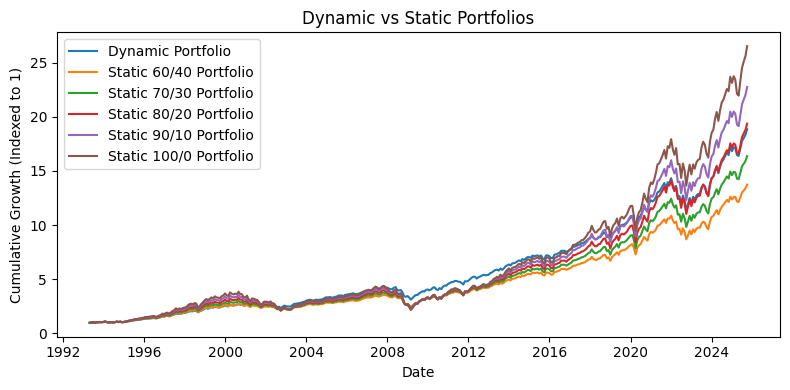

In [751]:
# plot the cumulative returns
plt.figure(figsize=(8, 4))
plt.plot(cum_returns.index, cum_returns['Dynamic_Return'], label='Dynamic Portfolio')
plt.plot(cum_returns.index, cum_returns['Static_6040'], label='Static 60/40 Portfolio')
plt.plot(cum_returns.index, cum_returns['Static_7030'], label='Static 70/30 Portfolio')
plt.plot(cum_returns.index, cum_returns['Static_8020'], label='Static 80/20 Portfolio')
plt.plot(cum_returns.index, cum_returns['Static_9010'], label='Static 90/10 Portfolio')
plt.plot(cum_returns.index, cum_returns['Static_100'], label='Static 100/0 Portfolio')
plt.title('Dynamic vs Static Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Growth (Indexed to 1)')
plt.legend()
plt.tight_layout()
plt.show()


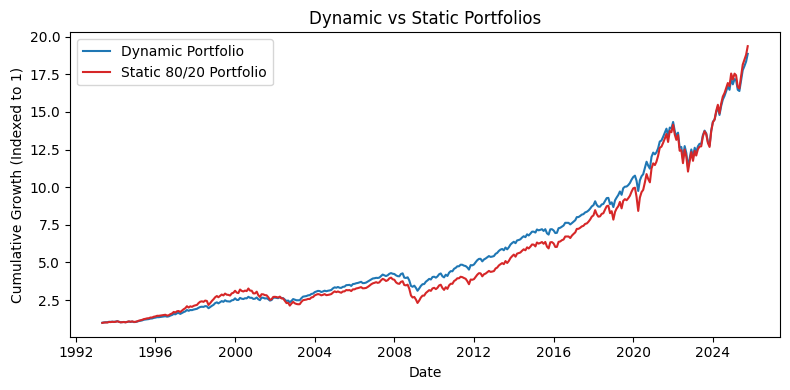

In [752]:
# plot the cumulative returns
plt.figure(figsize=(8, 4))
plt.plot(cum_returns.index, cum_returns['Dynamic_Return'], label='Dynamic Portfolio')
plt.plot(cum_returns.index, cum_returns['Static_8020'], label='Static 80/20 Portfolio', color='tab:red')
plt.title('Dynamic vs Static Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Growth (Indexed to 1)')
plt.legend()
plt.tight_layout()
plt.show()


Note: This is an in-sample backtesting where we fit K-means clustering on the entire data set and evaluated the strategy on the same period. Because the clustering model used the entire data set, these performances are overstated due to look-ahead bias.

Regression

In [753]:
# first we need column for the bucket to weight mapping
bucket_to_weight = {
    '80/20': 0.8,
    '70/30': 0.7,
    '60/40': 0.6,
    '50/50': 0.5
}

# create a target column whose values represent the stock allocation strategy
df['target_weight'] = df['Bucket'].map(bucket_to_weight)
# select features for regression
regression_features = ['SPY_3m', 
                          'VBMFX_3m', 
                          'UST10Y_Delta3m',
                          'Mort30Y_Delta3m',
                          'UST10Y',
                          'UST2Y',
                          'CorpAAA',
                          'Mort30Y',
                          'Slope_10Y_3M',
                          'Slope_10Y_FF',
                          'Slope_10Y_2Y',
                          'RetailTrade']
# create a new dataframe for regression
df_regression = df.loc[:, regression_features].copy()
# drop any rows with missing values
df_regression.dropna(inplace=True)

# scale the features
scaler = StandardScaler() # initialize 
X_scaled = scaler.fit_transform(df_regression[regression_features]) # don't include target weight
df_regression[regression_features] = X_scaled # update the df_regression with scaled values
df_regression['target_weight'] = df.loc[df_regression.index, 'target_weight'] # add target weight back
# train-test split
train = df_regression[df_regression.index < '2018-01-01']
test  = df_regression[df_regression.index >= '2018-01-01']
X_train, y_train = train[regression_features], train['target_weight']
X_test,  y_test  = test[regression_features],  test['target_weight']



Ridge Regression

In [754]:
model = Ridge(alpha=0.5) # start with penalty of 0.5
model.fit(X_train, y_train) 
# predict stock weights for 2000–2025
y_pred = model.predict(X_test)
# convert continuous prediction to nearest 0.05 increment
def round_to_bucket(x):
    'function to convert continuous weight to nearest bucket/strategy'
    if x >= 0.79: return '80/20'
    elif x >= 0.69: return '70/30'
    elif x >= 0.59: return '60/40'
    else: return '50/50'

test['Pred_Weight'] = y_pred.clip(0.5, 0.8)  # keep inside realistic bounds
test['Pred_Bucket'] = test['Pred_Weight'].apply(round_to_bucket) # convert to bucket, similar to clustering

test.head()

C:\Users\dorna\AppData\Local\Temp\ipykernel_11532\2667081436.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred_Weight'] = y_pred.clip(0.5, 0.8)  # keep inside realistic bounds
C:\Users\dorna\AppData\Local\Temp\ipykernel_11532\2667081436.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred_Bucket'] = test['Pred_Weight'].apply(round_to_bucket) # convert to bucket, similar to clustering


,SPY_3m,VBMFX_3m,UST10Y_Delta3m,Mort30Y_Delta3m,UST10Y,UST2Y,CorpAAA,Mort30Y,Slope_10Y_3M,Slope_10Y_FF,Slope_10Y_2Y,RetailTrade,target_weight,Pred_Weight,Pred_Bucket
2018-01-31,1.008987,-0.870641,0.765226,0.516058,-0.697584,-0.371652,-1.103683,-0.965842,-0.086224,0.117149,-0.422039,0.624217,0.6,0.669030,60/40
2018-02-28,0.029387,-1.263490,1.002613,1.201026,-0.608213,-0.319488,-0.940510,-0.810759,-0.117918,0.223137,-0.378429,0.642418,0.6,0.689791,60/40
2018-03-31,-0.521613,-1.189463,0.765226,1.082928,-0.685668,-0.310004,-0.986199,-0.785946,-0.284313,-0.117537,-0.541967,0.639102,0.6,0.671494,60/40
2018-04-30,-1.178430,-1.065500,0.527839,1.035689,-0.560548,-0.205676,-0.868714,-0.699099,-0.228848,0.026303,-0.552870,0.645513,0.6,0.663355,60/40
2018-05-31,-0.366450,-0.316353,-0.054837,0.397960,-0.632045,-0.248356,-0.933983,-0.711506,-0.371471,-0.072114,-0.585577,0.696373,0.6,0.607755,60/40


In [755]:

df_reg_full = df[df.index >= '2018-01-01'].join(test[['Pred_Weight','Pred_Bucket']], how='left')


In [756]:
df_reg_full.tail()

,SPY,SPY_mom,SPY_3m,SPY_3m_ann,SPY_3m_sd,SPY_3m_ann_sd,SPY_ln_3m,SPY_ann_ln_3m,VBMFX,VBMFX_mom,...,Bucket,Dynamic_Return,Static_6040,Static_7030,Static_8020,Static_9010,Static_100,target_weight,Pred_Weight,Pred_Bucket
2025-05-31,586.028015,0.062845,-0.005078,-0.020156,0.059701,0.119402,0.060949,-0.020362,9.469428,-0.007126,...,70/30,0.041854,0.034857,0.041854,0.048851,0.055848,0.062845,0.7,0.567450,50/50
2025-06-30,616.141785,0.051386,0.107772,0.505918,0.038411,0.076822,0.050110,0.409403,9.618223,0.015713,...,70/30,0.040684,0.037117,0.040684,0.044252,0.047819,0.051386,0.7,0.513069,50/50
2025-07-31,630.332458,0.023032,0.143197,0.707987,0.020495,0.040991,0.022770,0.535316,9.589507,-0.002986,...,70/30,0.015226,0.012625,0.015226,0.017828,0.020430,0.023032,0.7,0.556763,50/50
2025-08-31,643.266602,0.020520,0.097672,0.451746,0.017142,0.034284,0.020312,0.372767,9.669253,0.008316,...,70/30,0.016858,0.015638,0.016858,0.018079,0.019299,0.020520,0.7,0.500000,50/50
2025-09-30,666.179993,0.035620,0.081212,0.366607,0.008091,0.016183,0.035001,0.312331,9.770000,0.010419,...,70/30,0.028060,0.025540,0.028060,0.030580,0.033100,0.035620,0.7,0.520055,50/50


In [757]:
y_pred

array([0.66903047, 0.6897908 , 0.67149364, 0.66335515, 0.60775467,
       0.63435832, 0.61535986, 0.6161727 , 0.63579047, 0.64754582,
       0.64208511, 0.54651312, 0.49944494, 0.53451667, 0.5226321 ,
       0.54955478, 0.46303626, 0.49032577, 0.48848727, 0.44790881,
       0.51684213, 0.51979651, 0.63149908, 0.61686731, 0.54245703,
       0.45027844, 0.44812903, 0.49402485, 0.53780961, 0.53559788,
       0.53043485, 0.57954497, 0.58943006, 0.6601177 , 0.5980807 ,
       0.59970255, 0.59624199, 0.67669627, 0.71470455, 0.66326422,
       0.60079675, 0.52689939, 0.51367597, 0.53099379, 0.59523562,
       0.63866865, 0.61709971, 0.60457429, 0.67537441, 0.71771734,
       0.80419517, 0.87236112, 0.81548899, 0.75337504, 0.5459529 ,
       0.66975532, 0.76040259, 0.86263263, 0.653736  , 0.55596693,
       0.40491319, 0.60640393, 0.4539034 , 0.52386615, 0.48255242,
       0.60550936, 0.62609633, 0.59865293, 0.67578382, 0.70889455,
       0.56533501, 0.34822199, 0.31292121, 0.50259012, 0.58706

In [758]:


# create a dynamic portfolio using the weights we assigned using the clustering methodology
# multiple the monthly return by the weight for SPY and VBMFX
df['Dynamic_Return'] = df.apply(
    lambda row: weights[row['Bucket']][0]*row['SPY_mom'] + # [0] is stock allocation
                weights[row['Bucket']][1]*row['VBMFX_mom'], axis=1) # [1] is bond allocation

df['Static_6040'] = 0.6*df['SPY_mom'] + 0.4*df['VBMFX_mom'] # 60/40 allocation
df['Static_7030'] = 0.7*df['SPY_mom'] + 0.3*df['VBMFX_mom'] # 70/30 allocation
df['Static_8020'] = 0.8*df['SPY_mom'] + 0.2*df['VBMFX_mom'] # 80/20 allocation
df['Static_9010'] = 0.9*df['SPY_mom'] + 0.1*df['VBMFX_mom'] # 90/10 allocation
df['Static_100'] = 1.0*df['SPY_mom'] + 0.0*df['VBMFX_mom'] # 100/0 allocation


def performance_metrics(series):
    """returns a dataframe summarizing the return and std for each portfolio"""
    avg_ret = series.mean() * 12
    std = series.std() * np.sqrt(12)
    sharpe = avg_ret / std
    cum_return = (1 + series).prod() - 1
    return avg_ret, std, sharpe, cum_return

metrics = pd.DataFrame({
    'Dynamic Portfolio': performance_metrics(df['Dynamic_Return']),
    'Static_60/40': performance_metrics(df['Static_6040']),
    'Static_70/30': performance_metrics(df['Static_7030']),
    'Static_80/20': performance_metrics(df['Static_8020']),
    'Static_90/10': performance_metrics(df['Static_9010']),
    'Static_100/0': performance_metrics(df['Static_100'])
}, index=['Annualized Return', 'Annualized Std', 'Sharpe', 'Cumulative Return'])